# Task 3-1

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['font.sans-serif'] = 'SimHei' ## Set Chinese display
plt.rcParams['axes.unicode_minus'] = False

formdata1=pd.read_csv("../newdata/task1_1_1.csv",encoding='gbk')#Read the table data for data1
formdata2=pd.read_csv("../newdata/task1_1_2.csv",encoding='gbk')#Read the table data for data2

formdata1["CardNo"]=formdata1["CardNo"].astype("str")#Converts the card number to a character
formdata2["CardNo"]=formdata1["CardNo"].astype("str")

formdata1_formdata2=pd.merge(formdata1,formdata2,left_on="CardNo",right_on="CardNo")#Associate the data1 and data2 tables
# formdata1_formdata2.to_csv("../result1/task1_2_1.csv")# Store the results of task 1.2


In [2]:
formdata3=pd.read_csv("../newdata/task1_1_3.csv",encoding='gbk')#Read the table data from data3
formdata3["AccessCardNo"]=formdata3["AccessCardNo"].astype("str")#Converts the access card number to a character
formdata1["AccessCardNo"]=formdata1["AccessCardNo"].astype("str")

formdata1_formdata3=pd.merge(formdata1,formdata3,left_on="AccessCardNo",right_on="AccessCardNo")#Associate the data1 and data3 tables

# formdata1_formdata3.to_csv("../result1/task1_2_2.csv")# Store the results of task 1.2

In [3]:
formdata2=pd.read_csv("../newdata/task1_1_2.csv",encoding='gbk')
formdata2.head(10)

,Unnamed: 0,Index,CardNo,PeoNo,Date,Money,FundMoney,Surplus,CardCount,Type,TermNo,OperNo,Dept
0,0,117342773,181316,20181316,2019-04-20 20:17:00,3.0,0.0,186.1,818,消费,49,235,第一食堂
1,1,117344766,181316,20181316,2019-04-20 08:47:00,0.5,0.0,199.5,814,消费,63,27,第二食堂
2,2,117346258,181316,20181316,2019-04-22 07:27:00,0.5,0.0,183.1,820,消费,63,27,第二食堂
3,3,117308066,181317,20181317,2019-04-21 07:46:00,3.5,0.0,50.2,211,消费,196,133,好利来食品店
4,4,117309001,181317,20181317,2019-04-19 22:31:00,2.5,0.0,61.7,209,消费,146,48,好利来食品店
5,5,117340105,181317,20181317,2019-04-20 12:14:00,8.0,0.0,53.7,210,消费,169,12,第三食堂
6,6,117340374,181317,20181317,2019-04-21 17:17:00,9.0,0.0,41.2,212,消费,169,12,第三食堂
7,7,117340515,181317,20181317,2019-04-22 11:48:00,8.0,0.0,33.2,213,消费,169,12,第三食堂
8,8,117305210,181318,20181318,2019-04-21 11:58:00,0.0,100.0,147.9,676,存款,202,143,财务处
9,9,117331420,181318,20181318,2019-04-20 12:05:00,7.0,0.0,53.4,673,消费,41,249,第四食堂


In [4]:
#Task 3.1
#the number of students
formdata2group3=formdata2[["CardNo","CardCount"]].groupby(by="CardNo")
student=formdata2group3["CardCount"].agg(np.max)#Figure out the total number of students
numberstudent=student.size
#Total number of card swipes
cardtime=formdata2["Index"].size
#Swiping per capita
percardtime=cardtime/numberstudent#Swiping per capita


#Total consumption
totalmoney=formdata2["Money"].agg(np.sum)
#Consumption per capita
permoney=totalmoney/numberstudent


print(percardtime,permoney)

60.139763779527556 245.80797359888834


In [5]:
# formdata3=pd.read_csv("../result1/task1_2_1.csv")
formdata3=formdata1_formdata2
formdata3.head()

,Unnamed: 0_x,Index_x,CardNo,Sex,Major,AccessCardNo,Unnamed: 0_y,Index_y,PeoNo,Date,Money,FundMoney,Surplus,CardCount,Type,TermNo,OperNo,Dept
0,0,1,180001,男,18国际金融,19762330,0,117342773,20181316,2019-04-20 20:17:00,3.0,0.0,186.1,818,消费,49,235,第一食堂
1,1,2,180002,男,18国际金融,20521594,1,117344766,20181316,2019-04-20 08:47:00,0.5,0.0,199.5,814,消费,63,27,第二食堂
2,2,3,180003,男,18国际金融,20513946,2,117346258,20181316,2019-04-22 07:27:00,0.5,0.0,183.1,820,消费,63,27,第二食堂
3,3,4,180004,男,18国际金融,20018058,3,117308066,20181317,2019-04-21 07:46:00,3.5,0.0,50.2,211,消费,196,133,好利来食品店
4,4,5,180005,男,18国际金融,20945770,4,117309001,20181317,2019-04-19 22:31:00,2.5,0.0,61.7,209,消费,146,48,好利来食品店


In [6]:
#Students of different genders in different majors
# formdata3=pd.read_csv("../result1/task1_2_1.csv")
formdata3=formdata1_formdata2
formdata3loc1=formdata3.loc[formdata3["Major"]=="18国际金融",["Major","Sex","Money"]]#18 international financial statements
formdata3loc2=formdata3.loc[formdata3["Major"]=="18会计",["Major","Sex","Money"]]#18 accounting table
formdata3loc3=formdata3.loc[formdata3["Major"]=="18动漫设计",["Major","Sex","Money"]]#18 animation design
formdata3loc1concat=pd.concat([formdata3loc1,formdata3loc2,formdata3loc3])

#Groups were used to obtain the consumption amount of students of different genders in different majors
formdata3groups=formdata3loc1concat[["Major","Sex","Money"]].groupby(by=["Major","Sex"])
sumformdata3groups=formdata3groups["Money"].agg([np.sum])
sumformdata3groups


sum
Major  Sex        
18会计   女    1657.0
       男      47.4
18动漫设计 女      97.4
       男     112.2
18国际金融 女     331.6
       男      60.7

<Figure size 432x432 with 0 Axes>

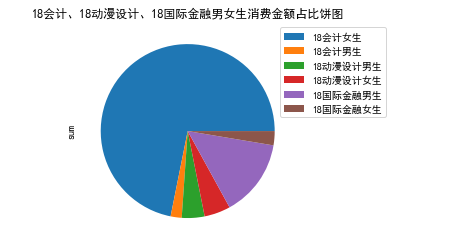

In [7]:
#The pie chart of consumption of students of different genders in different majors was obtained by grouping
pp=plt.figure(figsize=(6,6))
sumformdata3groups.plot(kind="pie",subplots=True,radius=1,textprops={'fontsize':20,'color':'white'})
plt.title("18会计、18动漫设计、18国际金融男女生消费金额占比饼图")
labels=["18会计女生","18会计男生","18动漫设计男生","18动漫设计女生","18国际金融男生","18国际金融女生"]
plt.legend(["18会计女生","18会计男生","18动漫设计男生","18动漫设计女生","18国际金融男生","18国际金融女生"],bbox_to_anchor=[0.9,1])
plt.savefig("../result3/18会计、18动漫设计、18国际金融男女生消费金额占比饼图.png")

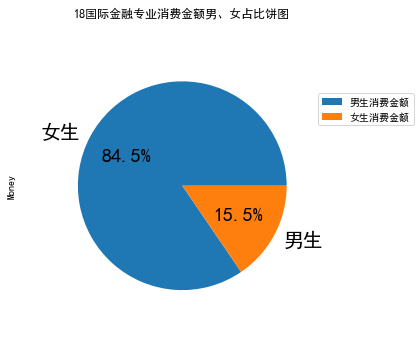

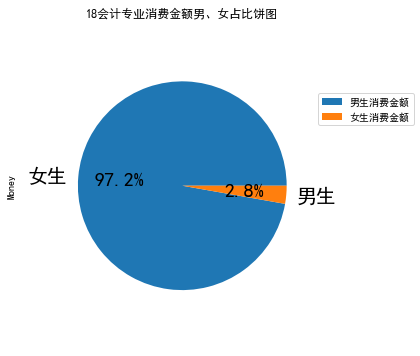

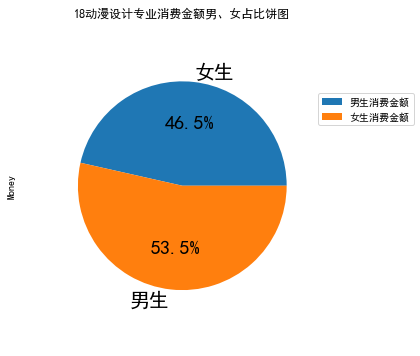

In [8]:
#International finance male and female consumption
p1=plt.figure(figsize=(6,6))
financegroup=formdata3loc1.groupby(by="Sex")
sunfinancegroup=financegroup["Money"].agg(np.sum)
#International financial men and women consumption pie chart
labels=["女生","男生"]
sunfinancegroup.plot(kind="pie",subplots=True,radius=0.8,textprops={'fontsize':20,'color':'black'},autopct="%1.1f%%",labels=labels)
plt.title("18国际金融专业消费金额男、女占比饼图")
plt.legend(["男生消费金额","女生消费金额"],bbox_to_anchor=[0.9,0.8])
plt.savefig("../result3/18国际金融专业消费金额男、女占比饼图.png")


#Accounting male and female consumption
p2=plt.figure(figsize=(6,6))
accountantgroup=formdata3loc2.groupby(by="Sex")
sumaccountantgroup=accountantgroup["Money"].agg(np.sum)
#18 accounting men and women consumption pie chart
labels=["女生","男生"]
sumaccountantgroup.plot(kind="pie",subplots=True,radius=0.8,textprops={'fontsize':20,'color':'black'},autopct="%1.1f%%",labels=labels)
plt.title("18会计专业消费金额男、女占比饼图")
plt.legend(["男生消费金额","女生消费金额"],bbox_to_anchor=[0.9,0.8])
plt.savefig("../result3/18会计专业消费金额男、女占比饼图.png")

#18 animation design male and female consumption pie chart
p3=plt.figure(figsize=(6,6))
cartoongroup=formdata3loc3.groupby(by="Sex")
sumcartoongroup=cartoongroup["Money"].agg(np.sum)
#18 animation design male and female consumption pie chart
labels=["女生","男生"]
sumcartoongroup.plot(kind="pie",subplots=True,radius=0.8,textprops={'fontsize':20,'color':'black'},autopct="%1.1f%%",labels=labels)
plt.title("18动漫设计专业消费金额男、女占比饼图")
plt.legend(["男生消费金额","女生消费金额"],bbox_to_anchor=[0.9,0.8])
plt.savefig("../result3/18动漫设计专业消费金额男、女占比饼图.png")